# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [13]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [14]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 31367
Number of validation examples = 7842
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

40


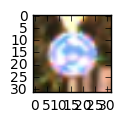

In [80]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, n_train)
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [59]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

#X_train, X_validation, X_test = (X_train - 127) / 128, (X_validation - 127) / 128, (X_test - 127) / 128

#rgb2yuv = np.array([[0.299, 0.587, 0.114],
#                    [-0.14713, -0.28886, 0.436],
#                    [0.615, -0.51499, -0.10001]])

#X_train, X_validation, X_test = np.dot(X_train, rgb2yuv.T), np.dot(X_validation, rgb2yuv.T), np.dot(X_test, rgb2yuv.T)

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I tried three different preprocessing techniques, but only used one in the end. First I normalized the RGB data to be in the range [-1.0, 1.0]. This alone did not have much effect on training accuracy. Then I tried converting the RGB images to YUV images as in the referenced paper. Again this had little effect. The only preprocessing I retained was shuffling the training set.

In [9]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I loaded the training and test sets from file. I then split the training set into a training subset and a validation subset. I allocated 20% of the training set towards the validation subset. When training the data, I shuffle the training subset every epoch while training, but leave the validation subset alone when evaluating the validation subset. When evaluating the test set, I do not shuffle the images.

In [15]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
import numpy as np

EPOCHS = 20
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def TrafficSign(x, keep_prob):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #grayscale = tf.image.rgb_to_grayscale(x, name='grayscale')
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    k1 = tf.Variable(tf.truncated_normal([5, 5, 3, 6], mu, sigma))
    kb1 = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, k1, [1,1,1,1], 'VALID', name='conv1') + kb1
    
    # Activation.
    actv1 = tf.nn.relu(conv1, name='actv1')

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    max1 = tf.nn.max_pool(actv1, [1,2,2,1], [1,2,2,1], 'VALID', name='pool1')
    
    # Layer 2: Convolutional. Output = 10x10x16.
    k2 = tf.Variable(tf.truncated_normal([5, 5, 6, 16], mu, sigma))
    kb2 = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(max1, k2, [1,1,1,1], 'VALID', name='conv2') + kb2
    
    # Activation.
    actv2 = tf.nn.relu(conv2, name='actv2')

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    max2 = tf.nn.max_pool(actv2, [1,2,2,1], [1,2,2,1], 'VALID', name='pool2')

    # Pooling. Input = 14x14x6. Output = 7x7x6
    max3 = tf.nn.max_pool(max1, [1,2,2,1], [1,2,2,1], 'VALID', name='pool3')
    
    # Flatten. Input = 7x7x6 (294) + 5x5x16 (400). Output = 694
    flat = tf.concat(1, [flatten(max3), flatten(max2)])
    
    # Layer 3: Fully Connected. Input = 694. Output = 120.
    w1 = tf.Variable(tf.truncated_normal([694, 120], mu, sigma))
    b1 = tf.Variable(tf.zeros(120))
    line1 = tf.matmul(flat, w1, name='line1') + b1
    
    # Activation.
    actv3 = tf.nn.relu(line1, name='actv3')
    
    drop1 = tf.nn.dropout(actv3, keep_prob, name='drop1')

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    w2 = tf.Variable(tf.truncated_normal([120, 84], mu, sigma))
    b2 = tf.Variable(tf.zeros(84))
    line2 = tf.matmul(drop1, w2, name='line2') + b2
    
    # Activation.
    actv4 = tf.nn.relu(line2, name='actv4')
    
    drop2 = tf.nn.dropout(actv4, keep_prob, name='drop2')

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    w3 = tf.Variable(tf.truncated_normal([84, n_classes], mu, sigma))
    b3 = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(drop2, w3, name='line3') + b3
    
    return logits


x = tf.placeholder(tf.float32, (None, 32, 32, 3))
keep_prob = tf.placeholder(tf.float32)
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001

logits = TrafficSign(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My architecture is adapted from the LeNet architecture. I use color images, size 32x32x3. There are two convolution layers coupled with max pool subsampling to transform the image into a set of features. Taking a cue from the LeCun paper, I use both subsampling layers as input to the first fully connected layer. In addition, the first subsampling layer is again downsampled using max pooling, and this twice-downsampled layer is flattened along with the downsampled second convolution layer into 694 features. These features are transformed into 120 output features in a fully-connected layer. I then use dropout to null 10% of these output features, which are then passed into a second fully-connected layer to become 84 features. I again dropout 10% of features before passing the output to the final fully-connected layer, which has n features, where n is the number of classes. I use ReLU for all of my activations.

In [60]:
### Train your model here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.9})
        
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    saver.save(sess, 'TrafficSign')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.452

EPOCH 2 ...
Validation Accuracy = 0.677

EPOCH 3 ...
Validation Accuracy = 0.810

EPOCH 4 ...
Validation Accuracy = 0.855

EPOCH 5 ...
Validation Accuracy = 0.887

EPOCH 6 ...
Validation Accuracy = 0.906

EPOCH 7 ...
Validation Accuracy = 0.923

EPOCH 8 ...
Validation Accuracy = 0.932

EPOCH 9 ...
Validation Accuracy = 0.938

EPOCH 10 ...
Validation Accuracy = 0.932

EPOCH 11 ...
Validation Accuracy = 0.933

EPOCH 12 ...
Validation Accuracy = 0.938

EPOCH 13 ...
Validation Accuracy = 0.958

EPOCH 14 ...
Validation Accuracy = 0.943

EPOCH 15 ...
Validation Accuracy = 0.965

EPOCH 16 ...
Validation Accuracy = 0.956

EPOCH 17 ...
Validation Accuracy = 0.960

EPOCH 18 ...
Validation Accuracy = 0.961

EPOCH 19 ...
Validation Accuracy = 0.964

EPOCH 20 ...
Validation Accuracy = 0.967

Model saved


In [91]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.914


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

After I found a good architecture I tuned the hyperparameters one at a time. I found the default batch size of 128 and the default learning rate of 0.001 to be good. A different leanring rate worked better with other optimizers, such as using 0.01 with the Adagrad optimizer and 0.0005 with the RMSProp optimizer, but ultimately the Adam optimizer with a learning rate of 0.001 was the most reliable and accurate combination I found. I found that 10 epochs was not enough for my architecture, as often better results could be obtained in epochs 15-20. However beyond 20 epochs the returns to additional training diminished, so I used 20 epochs. I initially tested with a keep probability for the dropout operations of 0.75, but found this to have worse results than no dropout. However a keep probability of 0.90 during training yielded good training results that also worked well on the test set.

My maximum validation accuracy was 0.973 while my test accuracy was 0.914.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started with the LeNet architecture, which was designed for image classification. I made two changes to it: adding dropout layers, which did not exist at the time the LeNet architecture was created and can make a model more reliable, and feeding the output from two different subsampling layers into my first fully-connected layer, as the LeCun paper suggested. I ran the naive LeNet implementation initially and was able to achieve around 95% accuracy on the test set. My improvements were able to raise that accuracy by about 2%.

When tuning the hyperparameters, I used a trial and error process. I only changed one hyperparameter at a time, and was able to isolate some good choices (optimizer, learning rate, and batch size) early on. I could have probably improved training accuracy by running more for epochs, but I did not see much utility in this. Indeed, I am satisfied that my test accuracy was >90%.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [50]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

children_sign = mpimg.imread('images/1965-Sign-for-Children-1024x911.jpeg')
yield_sign = mpimg.imread('images/yield-sign.png')
do_not_enter_sign = mpimg.imread('images/do-not-enter.jpeg')
stop_sign = mpimg.imread('images/stop-sign.jpeg')
slippery_sign = mpimg.imread('images/slippery-wet-car-sign.png')

raw_signs = [children_sign, yield_sign, do_not_enter_sign, stop_sign, slippery_sign]
signs = []
sign_labels = [28, 13, 17, 14, 23]

for sign in raw_signs:
    channels = cv2.split(sign)
    signs.append(cv2.merge(channels[0:3]))

for sign in signs:
    print(sign.shape)

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


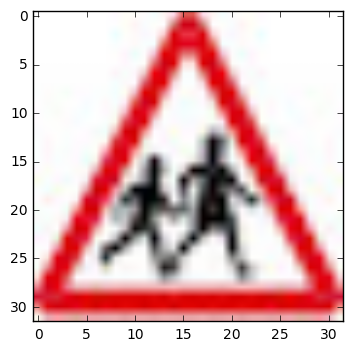

In [51]:
plt.imshow(children_sign)

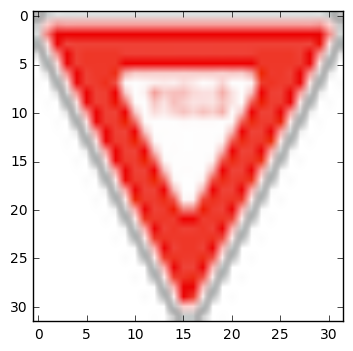

In [52]:
plt.imshow(yield_sign)

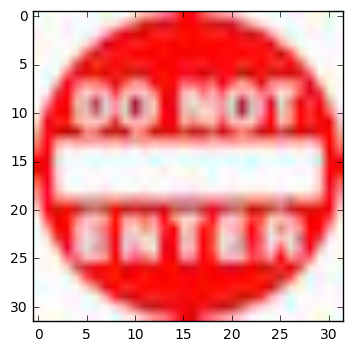

In [53]:
plt.imshow(do_not_enter_sign)

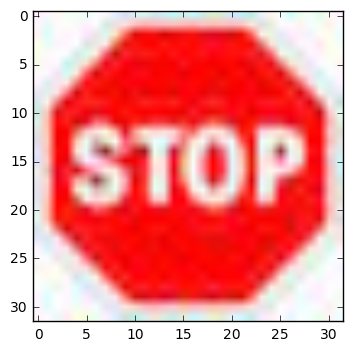

In [54]:
plt.imshow(stop_sign)

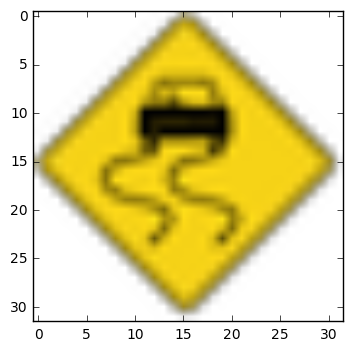

In [55]:
plt.imshow(slippery_sign)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The stop, yield, do not enter, and slippery road signs have distinctive shapes and colors, and I would suspect are easy to identify. The children crossing sign may be difficult, especially since the name of the file suggests it is from the year 1965. The figures on this sign are also small and of low resolution, so the identification of features may be difficult.

In [61]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(signs, sign_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.400


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

My model was not able to match the accuracy of its predictions against the test set when using my own images. I was only able to predict 2 out of 5 signs correctly, or 40% accuracy.

In [78]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

import csv

sign_lookup = {}

with open('signnames.csv', newline='\n') as csvfile:
    signreader = csv.reader(csvfile, delimiter=',')
    next(signreader, None)
    for row in signreader:
        sign_lookup[int(row[0])] = row[1]

def certainty(X_data, y_data):
    num_examples = len(X_data)
    sess = tf.get_default_session()
    soft_max = []
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        soft_max.append(sess.run(tf.nn.top_k(logits, k=5), feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0}))
        
    return soft_max

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_certainty = certainty(signs, sign_labels)
    
    values = test_certainty[0].values
    indices = test_certainty[0].indices
    
    for i in range(len(indices)):
        print("Image {0}".format(i))
        print()
        for j in range(len(indices[i])):
            print("{0}: {1:.2f}%".format(sign_lookup[indices[i][j]], values[i][j]))
        print()

Image 0

Right-of-way at the next intersection: 14.01%
Beware of ice/snow: 11.77%
Slippery road: 11.58%
Children crossing: 10.56%
Double curve: 8.19%

Image 1

Speed limit (80km/h): 0.84%
Speed limit (120km/h): 0.74%
Speed limit (60km/h): 0.66%
Speed limit (100km/h): 0.44%
Right-of-way at the next intersection: 0.21%

Image 2

No entry: 102.29%
Children crossing: 47.57%
Speed limit (30km/h): 20.21%
No passing: 15.43%
Dangerous curve to the right: 14.31%

Image 3

Stop: 82.92%
No entry: 54.51%
General caution: 33.19%
Right-of-way at the next intersection: 32.22%
Road work: 25.53%

Image 4

Speed limit (80km/h): 0.56%
Speed limit (120km/h): 0.54%
Dangerous curve to the right: 0.45%
Right-of-way at the next intersection: 0.10%
Speed limit (60km/h): 0.05%



### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The model was correct and certain for the stop and no entry signs. It was not correct and uncertain for the yield and slippery road signs.

Surprisingly, the children crossing sign was the fourth highest prediction for that sample. The model was uncertain of this sample, and ultimately incorrect in its prediction.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.